In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.shape

(4269, 13)

In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.columns


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
df.duplicated().sum()


0

In [9]:
df['loan_id'].nunique()

4269

In [10]:
df1=df.copy()

In [11]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [12]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [13]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['education', 'self_employed', 'loan_status'], dtype='object')
Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


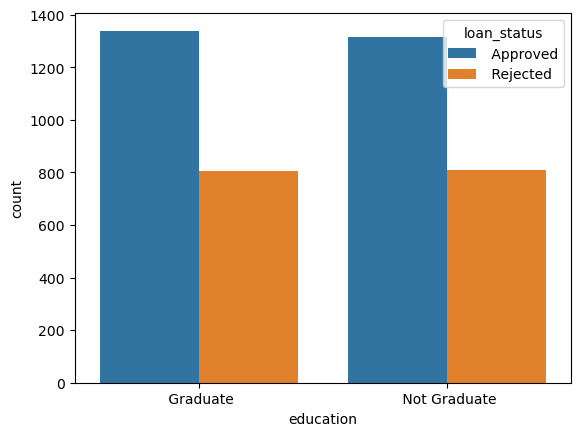

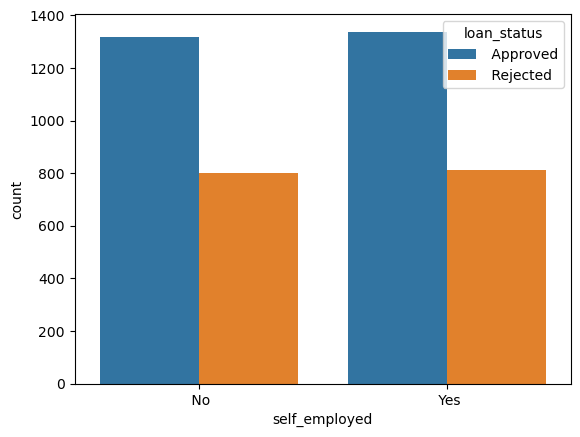

In [14]:
for i in cat_cols[:-1]:
    sns.countplot(x=df[i],hue=df['loan_status'])
    plt.show()

In [15]:
for i in num_cols:
    print(f'{i}- {df[i].nunique()}')

loan_id- 4269
no_of_dependents- 6
income_annum- 98
loan_amount- 378
loan_term- 10
cibil_score- 601
residential_assets_value- 278
commercial_assets_value- 188
luxury_assets_value- 379
bank_asset_value- 146


In [16]:
df['loan_term'].value_counts()

loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64

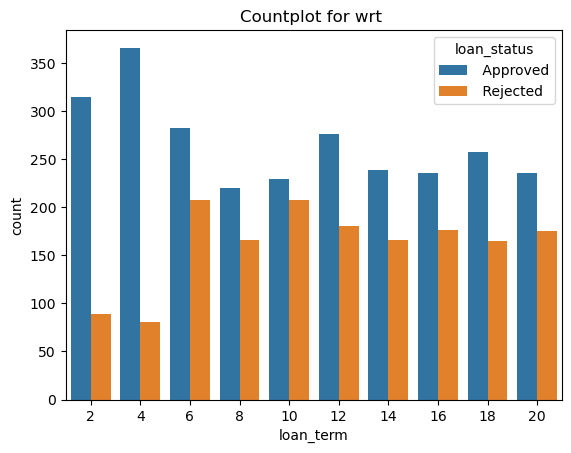

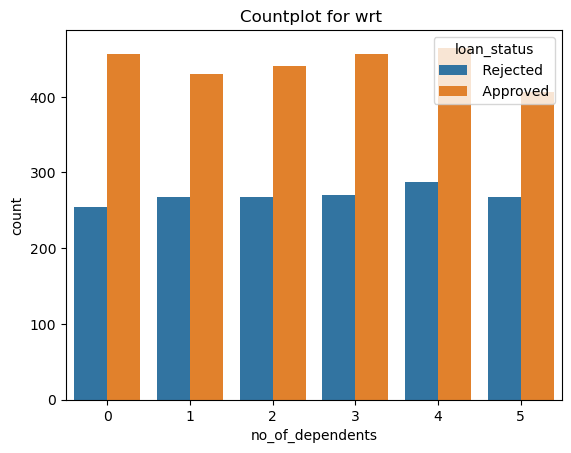

In [17]:
for i in ['loan_term','no_of_dependents']:
    sns.countplot(x=df[i],hue=df['loan_status'])
    plt.title('Countplot for wrt ')
    plt.show()

In [18]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [19]:
df_dum=pd.get_dummies(df.iloc[:,1:],columns=['education','self_employed'],drop_first=True)
print(df_dum.shape)
df_dum.columns


(4269, 12)


Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'education_ Not Graduate', 'self_employed_ Yes'],
      dtype='object')

In [20]:
x=df_dum.drop('loan_status',axis=1)
y=df_dum['loan_status']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4269, 11)
(4269,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 11)
(1281, 11)
(2988,)
(1281,)


In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [49]:
def eval_model(y_test,ypred,mname):
    cm=confusion_matrix(y_test,ypred)
    cr=classification_report(y_test,ypred)
    acc=accuracy_score(y_test,ypred)
    pre=precision_score(y_test,ypred,pos_label=' Approved')
    rec= recall_score(y_test,ypred,pos_label=' Approved')
    print(acc)
    print('confusion Matrix\n',cm)
    print('Classification report\n',cr)
    res=pd.DataFrame({'Acc':acc,'Pre':pre,'Rec':rec},index=['mname'])
    return res
    
def model_score(model):
    print("Train score",model.score(x_train,y_train))
    print("Test score",model.score(x_test,y_test))

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
lr1=LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)


LogisticRegression(max_iter=10000)

In [51]:
ypred_lr1=lr1.predict(x_test)
model_score(lr1)
lr1_res = eval_model(y_test,ypred_lr1,'Logreg')
lr1_res


Train score 0.8038821954484605
Test score 0.8212334113973458
0.8212334113973458
confusion Matrix
 [[731  62]
 [167 321]]
Classification report
               precision    recall  f1-score   support

    Approved       0.81      0.92      0.86       793
    Rejected       0.84      0.66      0.74       488

    accuracy                           0.82      1281
   macro avg       0.83      0.79      0.80      1281
weighted avg       0.82      0.82      0.82      1281



,Acc,Pre,Rec
mname,0.821233,0.814031,0.921816


In [28]:
knn1=KNeighborsClassifier(n_neighbors=15)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [53]:
ypred_knn1=knn1.predict(x_test)
model_score(knn1)
knn1_res=eval_model(y_test,ypred_knn1,'KNN')
knn1_res

Train score 0.6509370816599732
Test score 0.6034348165495707
0.6034348165495707
confusion Matrix
 [[686 107]
 [401  87]]
Classification report
               precision    recall  f1-score   support

    Approved       0.63      0.87      0.73       793
    Rejected       0.45      0.18      0.26       488

    accuracy                           0.60      1281
   macro avg       0.54      0.52      0.49      1281
weighted avg       0.56      0.60      0.55      1281



,Acc,Pre,Rec
mname,0.603435,0.631095,0.865069


In [30]:
dt1=DecisionTreeClassifier(criterion='gini',min_samples_split=15,max_depth=8)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=15)

In [54]:
ypred_dt1=dt1.predict(x_test)
model_score(dt1)
dt1_res=eval_model(y_test,ypred_dt1,'DT')
dt1_res

Train score 0.9789156626506024
Test score 0.9765807962529274
0.9765807962529274
confusion Matrix
 [[787   6]
 [ 24 464]]
Classification report
               precision    recall  f1-score   support

    Approved       0.97      0.99      0.98       793
    Rejected       0.99      0.95      0.97       488

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.98      1281



,Acc,Pre,Rec
mname,0.976581,0.970407,0.992434


In [32]:
rf1=RandomForestClassifier(n_estimators=75,criterion='gini',min_samples_split=15,max_depth=8)
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=15, n_estimators=75)

In [55]:
ypred_rf1=rf1.predict(x_test)
model_score(rf1)
rf1_res=eval_model(y_test,ypred_rf1,'RF')
rf1_res

Train score 0.9933065595716198
Test score 0.9711163153786104
0.9711163153786104
confusion Matrix
 [[774  19]
 [ 18 470]]
Classification report
               precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       793
    Rejected       0.96      0.96      0.96       488

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281



,Acc,Pre,Rec
mname,0.971116,0.977273,0.97604


In [56]:
combined=pd.concat([lr1_res,knn1_res,dt1_res,rf1_res])
combined

,Acc,Pre,Rec
mname,0.821233,0.814031,0.921816
mname,0.603435,0.631095,0.865069
mname,0.976581,0.970407,0.992434
mname,0.971116,0.977273,0.976040
